In [1]:
#code to create unique occupied states plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def count_unique_discretetized_states_per_position(df: pd.DataFrame, n_positions: int = 200) -> np.ndarray:
    counts = np.zeros(n_positions, dtype=int)
    for i in range(n_positions):
        cols = [f"PT_{i}", f"Eta_{i}", f"Phi_{i}"]
        if not all(c in df.columns for c in cols):
            continue
        mask = df[cols].notna().all(axis=1) & ~((df[cols] == -1).all(axis=1))
        counts[i] = df.loc[mask, cols].apply(tuple, axis=1).nunique()
    return counts


In [2]:
df = pd.read_hdf("../processed_data/TTBar_train_processed.h5", key = "discretized")

counts = count_unique_discretetized_states_per_position(df)

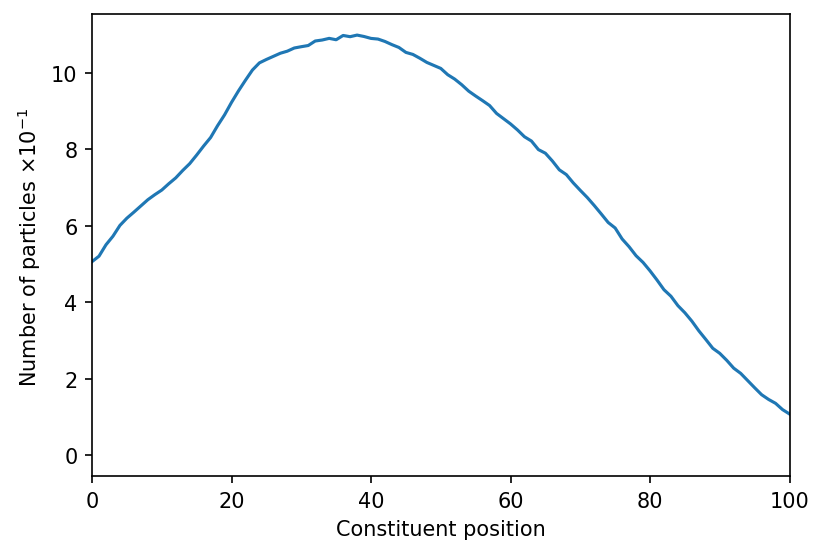

In [3]:
fig, ax = plt.subplots(figsize = (6, 4), dpi = 150)

ax.plot(counts*10**(-3))
ax.set_xlim(0, 100)

ax.set_ylabel(r"Number of particles $\times 10^{-1}$ ")
ax.set_xlabel("Constituent position")
plt.show()

In [4]:
df_HToBB = pd.read_hdf("../processed_data/HToBB_train_processed.h5", key = "discretized")

counts_HToBB = count_unique_discretetized_states_per_position(df_HToBB)

In [5]:
df_HToCC = pd.read_hdf("../processed_data/HToCC_train_processed.h5", key = "discretized")

counts_HToCC = count_unique_discretetized_states_per_position(df_HToCC)

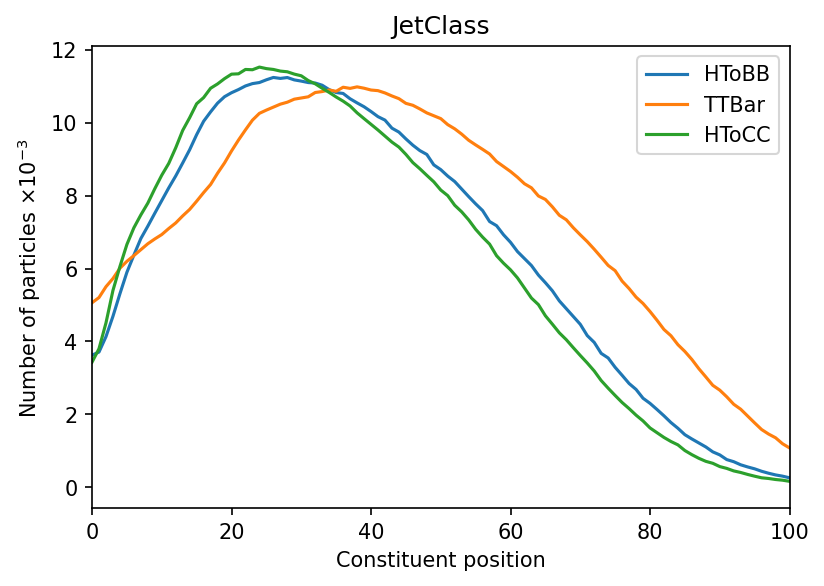

In [6]:
fig, ax = plt.subplots(figsize = (6, 4), dpi = 150)

ax.plot(counts_HToBB*10**(-3), label = "HToBB")
ax.plot(counts *10**(-3), label = "TTBar")
ax.plot(counts_HToCC*10**(-3), label = "HToCC")
ax.set_xlim(0, 100)

ax.set_ylabel(r"Number of particles $\times 10^{-3}$ ")
ax.set_xlabel("Constituent position")

ax.set_title("JetClass")
ax.legend()

plt.show()

In [8]:
df_TTBar_all = pd.read_hdf("/hpcwork/rwth0934/hep_foundation_model_data/preprocessed_data/TTBar_train_processed.h5", key = "discretized")

counts_TTBar_all = count_unique_discretetized_states_per_position(df_TTBar_all)

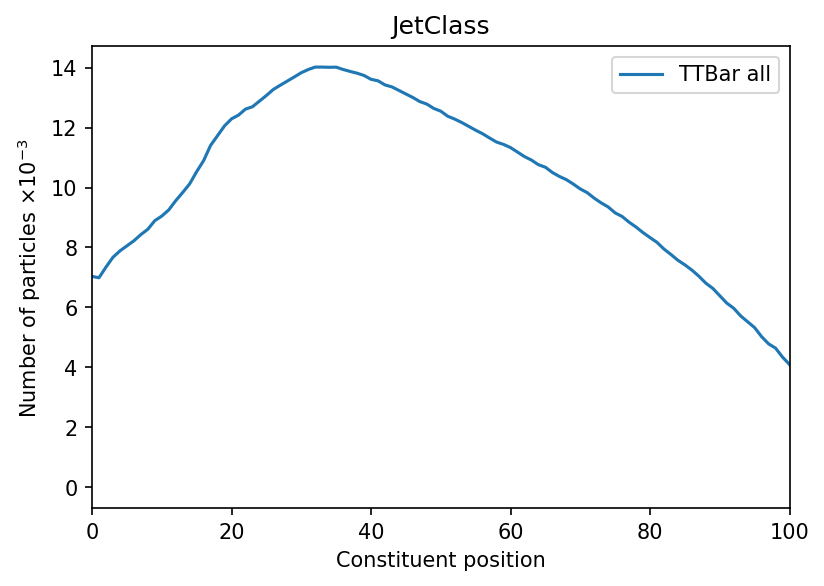

In [9]:
fig, ax = plt.subplots(figsize = (6, 4), dpi = 150)

ax.plot(counts_TTBar_all *10**(-3), label = "TTBar all")
ax.set_xlim(0, 100)

ax.set_ylabel(r"Number of particles $\times 10^{-3}$ ")
ax.set_xlabel("Constituent position")

ax.set_title("JetClass")
ax.legend()

plt.show()